In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 特征分析与选择
## 特征工程1

In [2]:
# 读取训练集和测试集为 DataFrame
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# 训练集数据
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


各字段的含义如下：

- PassengerId => 乘客ID
- Pclass => 乘客等级(1/2/3等舱位)
- Name => 乘客姓名
- Sex => 性别
- Age => 年龄
- SibSp => 堂兄弟/妹个数
- Parch => 父母与小孩个数
- Ticket => 船票信息
- Fare => 票价
- Cabin => 客舱
- Embarked => 登船港口

In [3]:
# 测试集数据
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# 训练数据集信息
train_data.info()
print '--------------------------------------'
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null o

In [5]:
# # 数据清洗，去除 PassengerId、Name、Ticket 字段的值
# train_data = train_data.drop(['PassengerId','Name','Ticket'], axis=1)
# test_data = test_data.drop(['Name','Ticket'], axis=1)
# train_data.head()

# 数据清洗，去除 PassengerId、Ticket 字段的值
train_data = train_data.drop(['PassengerId','Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [6]:
# 训练数据存在空数据
train_data.isnull().head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False


** 分析 Embarked 特征对 Survived 的影响 **

S


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False


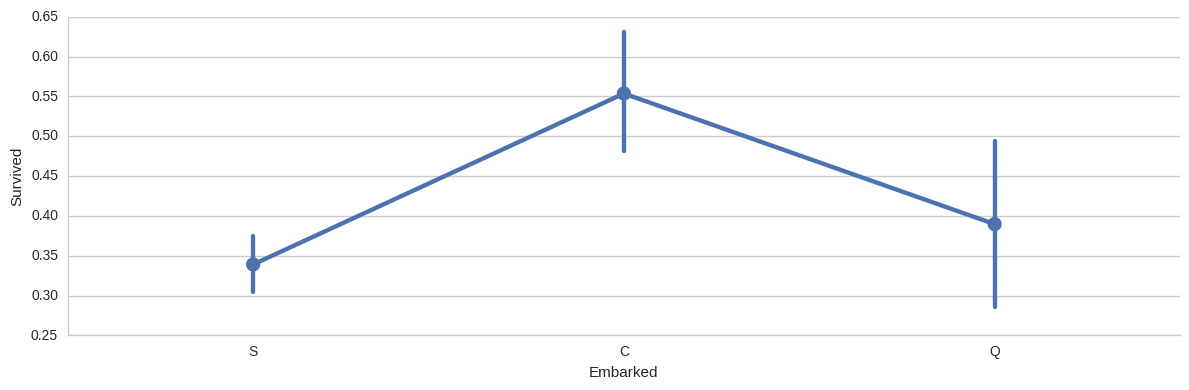

In [7]:
# 对于训练集，讲 Embarked 缺失的数据填充为最多的值 S
print train_data['Embarked'].max()
train_data['Embarked'] = train_data['Embarked'].fillna('S')
# size, aspect 指定绘制图像的大小
sns.factorplot('Embarked','Survived', data=train_data, size=4, aspect=3)
train_data.isnull().head()

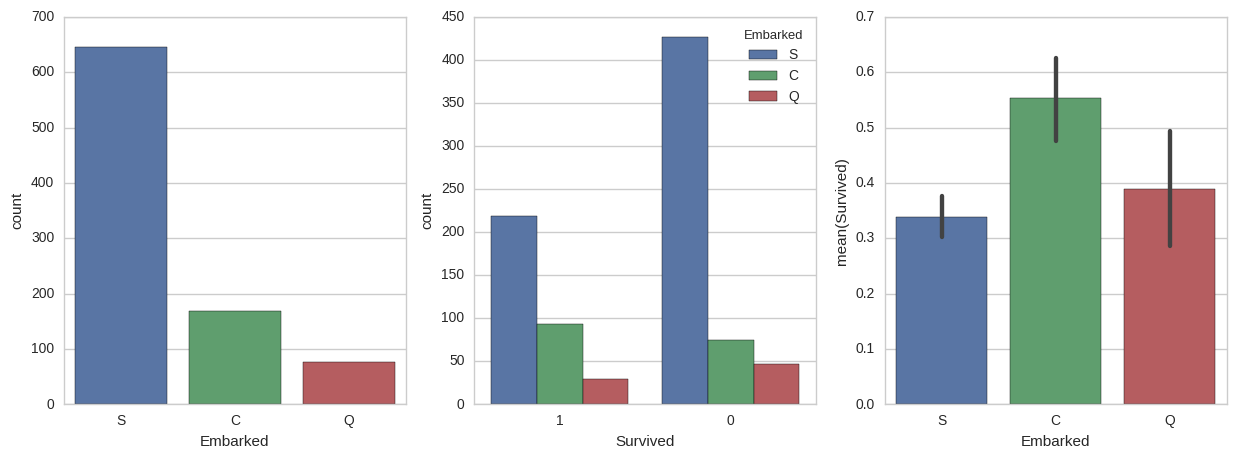

In [8]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=train_data, ax=axis2, order=[1,0])
# 按照 Embarked 分组, 对每组计算 survived 的平均值
embark_perc = train_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=train_data, order=['S','C','Q'], ax=axis3)

由图可以看出，Embarked属性对 Survived 贡献并不明显。

** 分析 Fare 特征对 Survived 的影响 **

In [9]:
# 测试训练集和测试集的 Fare 特征是否存在缺失数据，测试集中存在一条缺失数据
print train_data.ix[train_data['Fare'].isnull()].shape, \
test_data.ix[test_data['Fare'].isnull()].shape
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data.ix[152]

(0, 10) (1, 10)


PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Fare                      32.2042
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

48.3954076023 66.5969981183
22.1178868852 31.3882065306


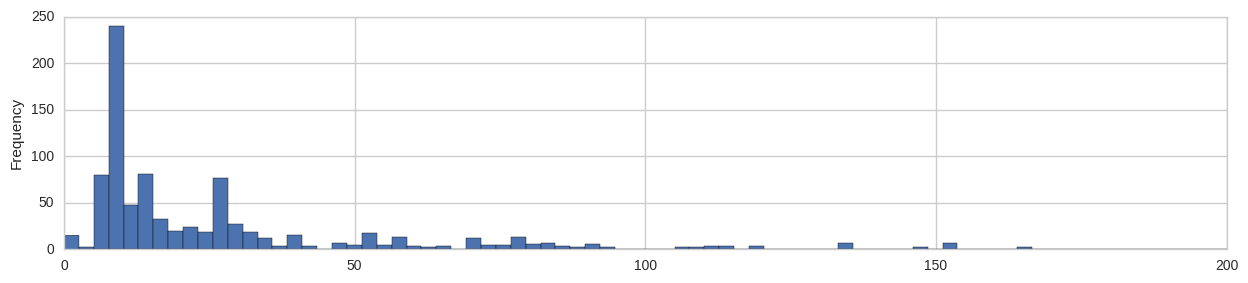

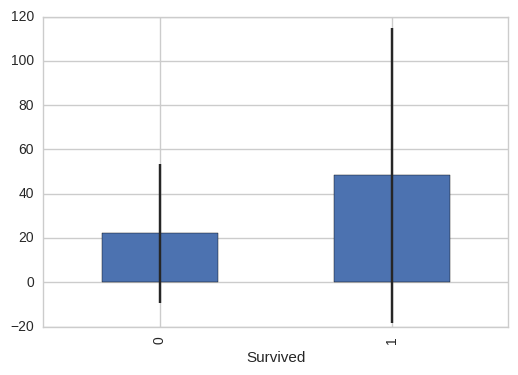

In [10]:
# 获取 survived / not survived 数据中的 Fare 属性的数据
survived_fare_train = train_data['Fare'][train_data['Survived'] == 1]
notsurvived_fare_train = train_data['Fare'][train_data['Survived'] == 0]

avgerage_fare = DataFrame([notsurvived_fare_train.mean(), survived_fare_train.mean()])
std_fare      = DataFrame([notsurvived_fare_train.std(), survived_fare_train.std()])

print survived_fare_train.mean(), survived_fare_train.std()
print notsurvived_fare_train.mean(), notsurvived_fare_train.std()

train_data['Fare'].plot(kind='hist', figsize=(15,3),bins=200, xlim=(0,200))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

由图可以基本看出，Fare 值越大(票价越高，社会等级越高)，存活的可能性相对越大，且分布在均值为48，方差为66，正负误差在-19 ～119左右。

** 分析 Age 特征对 Survived 的影响 **

In [11]:
# 测试训练集和测试集的 Age 特征是否存在确实数据
# train_data.ix[train_data['Age'].isnull()].head()
test_data.ix[test_data['Age'].isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,8.0500,NaN,S


说明训练集和测试集的 Age 特征骏存在缺失数据，对于缺失数据，将其填充为高斯分布（mean，std满足训练集分布）的随机值。（针对名字中的 Mrs Mr Mrs Miss 指定年龄大小！）

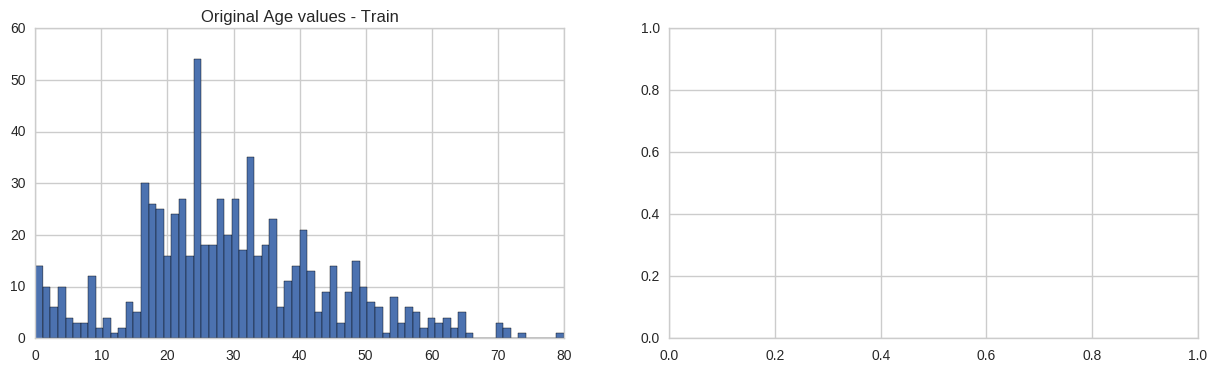

In [12]:
# 计算训练集和测试集年龄的 average, std, NaN 的数目
average_age_train = train_data['Age'].mean()
std_age_train = train_data['Age'].std()
nan_age_count_train = train_data['Age'].isnull().sum()

average_age_test = test_data['Age'].mean()
std_age_test = test_data['Age'].std()
nan_age_count_test = test_data['Age'].isnull().sum()

# 生成高斯分布（mean，std满足训练集分布）的随机值
rand_age_train = np.random.randint(average_age_train-std_age_train, average_age_train+std_age_train, 
                                   size=nan_age_count_train)
rand_age_test = np.random.randint(average_age_test-std_age_test, average_age_test+std_age_test, 
                                   size=nan_age_count_test)

# 绘制原始数据的 Age 特征
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Train')
train_data['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# 注意此处缺失数据的补齐并不是采用次方法，见下面的特种工程2!

# 对缺失数据进行补全
# train_data['Age'][np.isnan(train_data['Age'])] = rand_age_train
# test_data['Age'][np.isnan(test_data['Age'])] = rand_age_test

# 绘制补全缺失数据的 Age 特征
# axis2.set_title('New Age values - Train')
# train_data['Age'].astype(int).hist(bins=70, ax=axis2)

In [13]:
train_data.ix[train_data['Age'].isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,NaN,Q


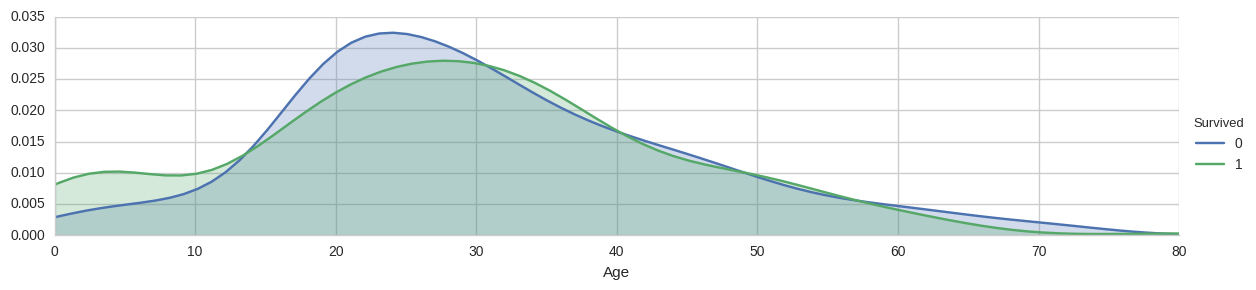

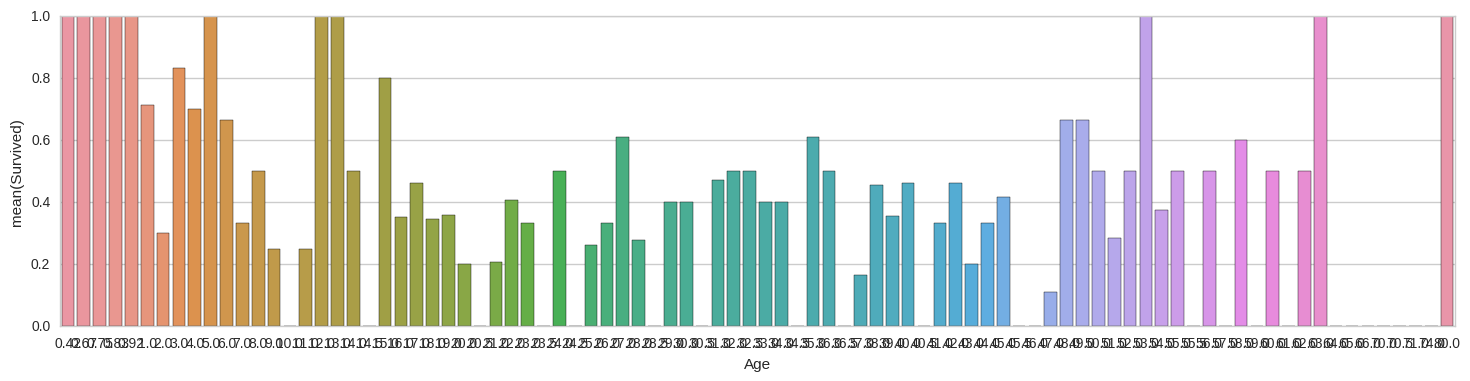

In [14]:
# peaks for survived/not survived passengers by their age， aspect设置绘图的大小
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
# 拟合和绘制一元或二元概率密度分布
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)


**  分析 Cabin 特征对 Survived 的影响 **

In [15]:
# 测试训练集和测试集的 Age 特征是否存在缺失数据
train_data.ix[train_data['Cabin'].isnull()].shape, \
test_data.ix[test_data['Cabin'].isnull()].shape

((687, 10), (327, 10))

测试发现 Cabin 字段存在过多的 NaN 缺失数据，所以考虑将 Cabin 字段删除。

In [16]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

** SibSp(堂兄弟/妹个数) 和 Parch（父母与小孩个数） 特征，可以将其组合成 Family 组合属性，Family成员个数是否对 Survive 有贡献。 **

In [17]:
# 测试训练集和测试集的 Parch 和 SibSp 特征是否存在缺失数据，测试发现不存在缺失数据。
train_data.ix[train_data['SibSp'].isnull()].shape, \
test_data.ix[test_data['SibSp'].isnull()].shape, \
train_data.ix[train_data['Parch'].isnull()].shape, \
test_data.ix[test_data['Parch'].isnull()].shape

((0, 9), (0, 9), (0, 9), (0, 9))

In [18]:
# Parch 和 SibSp 特征组合成 Family 特征
train_data['Family'] = train_data['Parch'] + train_data['SibSp']
test_data['Family'] = test_data['Parch'] + test_data['SibSp']

# drop Parch & SibSp
train_data.drop(['Parch', 'SibSp'], axis=1, inplace=True)
test_data.drop(['Parch', 'SibSp'], axis=1, inplace=True)

train_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0


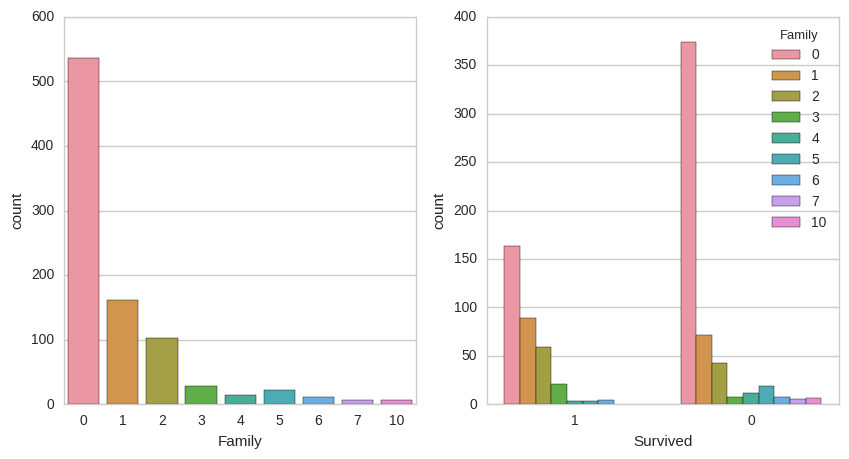

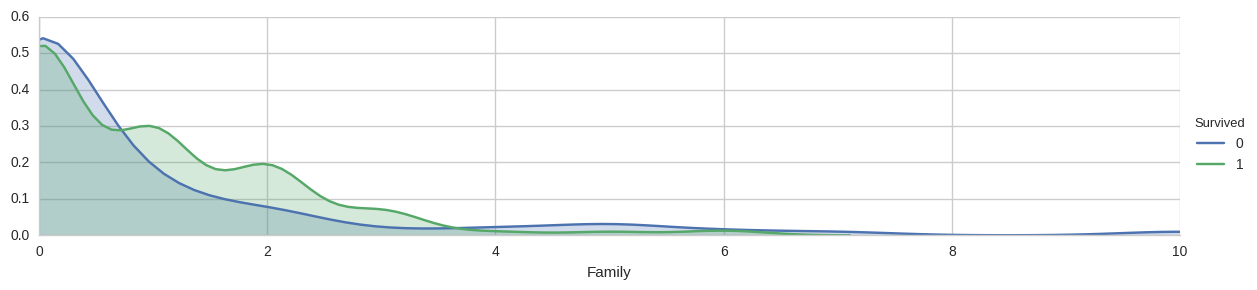

In [19]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))

sns.countplot(x='Family', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue='Family', data=train_data, ax=axis2, order=[1,0])

# peaks for survived/not survived passengers by Family， aspect设置绘图的大小
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
# 拟合和绘制一元或二元概率密度分布
facet.map(sns.kdeplot,'Family',shade= True)
facet.set(xlim=(0, train_data['Family'].max()))
facet.add_legend()

由图可看出，训练集中 survived / not survived 类型中 Age 的分布近似相同，所以可以猜测 Age 特征对 survived 的贡献不大。

** 分析 Sex 特征对 Survived 的影响 **

In [20]:
# 测试训练集和测试集的 Sex 特征是否存在确实数据，测试不存在缺失数据
train_data.ix[train_data['Sex'].isnull()].head()
test_data.ix[test_data['Sex'].isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family


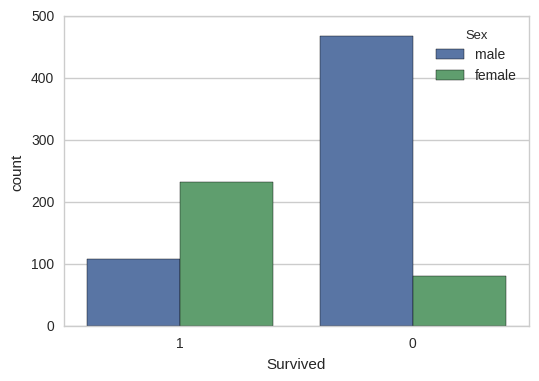

In [21]:
survived_Sex_train = train_data['Sex'][train_data['Survived'] == 1]
notsurvived_Sex_train = train_data['Sex'][train_data['Survived'] == 0]

sns.countplot(x='Survived', hue='Sex', data=train_data, order=[1,0])

可以看出，存活的人中 female 较多，未存活的 male 较多。按照常识可知， children 和 femail 有更高的存活几率。按照 Age 和 Sex 组合分类为 Person 类别。

In [22]:
def get_person(person_data):
    age, sex = person_data
    return 'child' if age < 16 else sex

train_data['Person'] = train_data[['Age', 'Sex']].apply(get_person, axis=1)
test_data['Person'] = test_data[['Age', 'Sex']].apply(get_person, axis=1)

# drop sex column
train_data.drop('Sex', axis=1, inplace=True)
test_data.drop('Sex', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Name,Age,Fare,Embarked,Family,Person
0,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,S,1,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,C,1,female
2,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,S,0,female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,S,1,female
4,0,3,"Allen, Mr. William Henry",35.0,8.0500,S,0,male


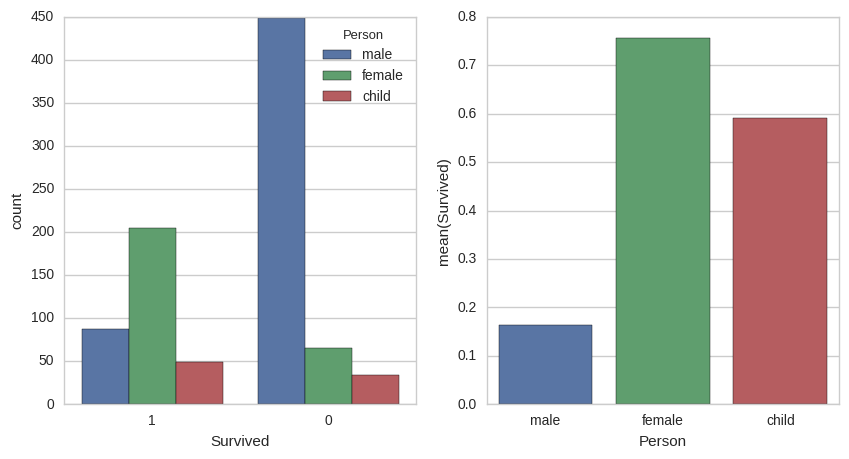

In [23]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='Survived', hue='Person', data=train_data, order=[1, 0], ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_data[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

可以看出，在存活的人中，male（非child） 所占比例最低，female、child 较高。

In [24]:
train_data.head()

,Survived,Pclass,Name,Age,Fare,Embarked,Family,Person
0,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,S,1,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,C,1,female
2,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,S,0,female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,S,1,female
4,0,3,"Allen, Mr. William Henry",35.0,8.0500,S,0,male


**  分析 Pclass(乘客等级1/2/3等舱位) 特征对 Survived 的影响 **

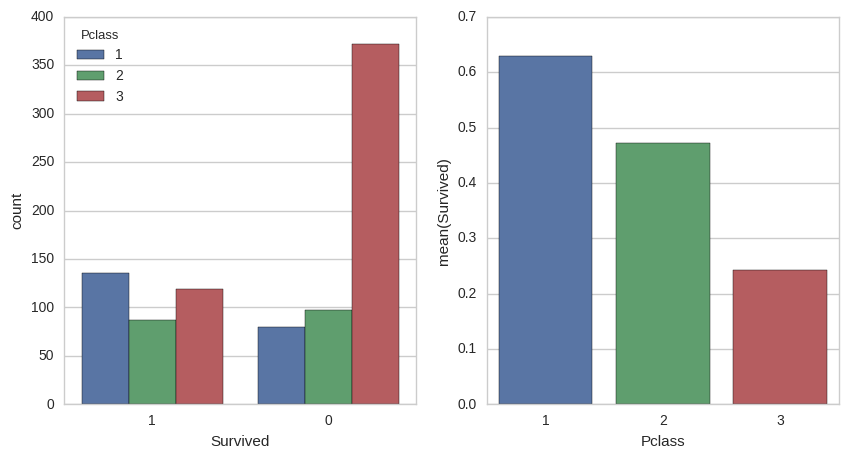

In [25]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='Survived', hue='Pclass', data=train_data, order=[1, 0], ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_data[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=person_perc, ax=axis2, order=[1,2,3])

由图可以看出，乘客等级为3的舱位存活的几率较低，等级为1的舱位存活几率较高。

** 特征选择的结果为: **
- Pclass => 乘客等级(1/2/3等舱位)
- Age => 年龄
- Fare => 票价
- Embarked => 登船港口
- Family => 登船时的家庭成员情况
- Person => male、female、child

## 特征工程2
分析发现 Age 字段存在缺失值，不应该将其初始化为随机值，应该根据名字中的 Miss,Ms. Mrs. Mr. Dr 在一定范围内初始化（可统计其平均值）。

In [26]:
# 测试训练集和测试集的 Sex 特征是否存在确实数据，测试不存在缺失数据
train_data.ix[train_data['Age'].isnull()].head()
# test_data.ix[test_data['Age'].isnull()].head()

train_data.shape, test_data.shape

((891, 8), (418, 8))

In [27]:
def replace_name_call(name):
    if name.find('Mr.') != -1:
        return 'Mr'
    elif name.find('Mrs.') != -1:
        return 'Mrs'
    elif name.find('Miss.') != -1:
        return 'Miss'
    elif name.find('Master.') != -1:
        return 'Master'
    elif name.find('Don.') != -1:
        return 'Don'
    elif name.find('Rev.') != -1:
        return 'Rev'
    elif name.find('Dr.') != -1:
        return 'Dr'
    elif name.find('Mme.') != -1:
        return 'Mme'
    elif name.find('Ms.') != -1:
        return 'Ms'
    elif name.find('Major.') != -1:
        return 'Major'
    elif name.find('Lady.') != -1:
        return 'Lady'
    elif name.find('Sir.') != -1:
        return 'Sir'
    elif name.find('Mlle.') != -1:
        return 'Mlle'
    elif name.find('Col.') != -1:
        return 'Col'
    elif name.find('Capt.') != -1:
        return 'Capt'
    elif name.find('Countess.') != -1:
        return 'Countess'
    elif name.find('Jonkheer.') != -1:
        return 'Jonkheer'
    else:
        return 'None'
    
train_data['Name'] = train_data['Name'].apply(replace_name_call)
test_data['Name'] = test_data['Name'].apply(replace_name_call)
name = train_data['Name'].tolist()
[x for x in range(len(name)) if name[x] == 'None']

[]

In [28]:
train_data.head()

,Survived,Pclass,Name,Age,Fare,Embarked,Family,Person
0,0,3,Mr,22.0,7.2500,S,1,male
1,1,1,Mrs,38.0,71.2833,C,1,female
2,1,3,Miss,26.0,7.9250,S,0,female
3,1,1,Mrs,35.0,53.1000,S,1,female
4,0,3,Mr,35.0,8.0500,S,0,male


In [29]:
# 统计不同称呼的人的平均年龄
name_age_mean = train_data[["Name", "Age"]].groupby(['Name'],as_index=False).mean()
name_age_mean

,Name,Age
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.000000
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.574167
9,Miss,21.773973


In [30]:
# 对于缺失的 Age 数据，将其填充为该 Name 类别的年龄的平均值
train_age_none = train_data.ix[train_data['Age'].isnull()].copy()
test_age_none = test_data.ix[test_data['Age'].isnull()].copy()

def fill_age_by_name(name):
    age = name_age_mean['Age'][name_age_mean['Name'] == name]
    return int(age.values[0])

train_age_none['Age'] = train_age_none['Name'].apply(fill_age_by_name)
test_age_none['Age'] = test_age_none['Name'].apply(fill_age_by_name)

In [31]:
# 对缺失数据进行补全
train_data['Age'][np.isnan(train_data['Age'])] = train_age_none['Age']
test_data['Age'][np.isnan(test_data['Age'])] = test_age_none['Age']
train_data.head()

# train_data.shape, test_data.shape

/home/sunnymarkliu/software/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sunnymarkliu/software/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Survived,Pclass,Name,Age,Fare,Embarked,Family,Person
0,0,3,Mr,22.0,7.2500,S,1,male
1,1,1,Mrs,38.0,71.2833,C,1,female
2,1,3,Miss,26.0,7.9250,S,0,female
3,1,1,Mrs,35.0,53.1000,S,1,female
4,0,3,Mr,35.0,8.0500,S,0,male


# 模型构建

## Feature Scaling
对 Age 、 Fare 数据进行 Feature Scaling 处理。

In [32]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(train_data[['Age', 'Fare']])
df_std = std_scale.transform(train_data[['Age', 'Fare']])

train_data['Age'] = df_std[:,0]
train_data['Fare'] = df_std[:,1]

std_scale_test = preprocessing.StandardScaler().fit(test_data[['Age', 'Fare']])
df_std_test = std_scale_test.transform(test_data[['Age', 'Fare']])

test_data['Age'] = df_std_test[:,0]
test_data['Fare'] = df_std_test[:,1]

print train_data.shape, test_data.shape
train_data.head()


(891, 8) (418, 8)


,Survived,Pclass,Name,Age,Fare,Embarked,Family,Person
0,0,3,Mr,-0.576496,-0.502445,S,1,male
1,1,1,Mrs,0.628536,0.786845,C,1,female
2,1,3,Miss,-0.275238,-0.488854,S,0,female
3,1,1,Mrs,0.402593,0.420730,S,1,female
4,0,3,Mr,0.402593,-0.486337,S,0,male


In [33]:
test_data.head()

,PassengerId,Pclass,Name,Age,Fare,Embarked,Family,Person
0,892,3,Mr,0.341367,-0.498258,Q,0,male
1,893,3,Mrs,1.301088,-0.513125,S,1,female
2,894,2,Mr,2.452754,-0.464940,Q,0,male
3,895,3,Mr,-0.234466,-0.483317,S,0,male
4,896,3,Mrs,-0.618354,-0.418323,S,2,female


## 数据的特征选择及向量化

In [34]:
# 对数据集进行向量化等处理
# 提取训练集特征和结果
X_train = train_data.drop(['Survived', 'Name'],axis=1)
Y_train = train_data['Survived']

X_test  = test_data.drop(['PassengerId', 'Name'],axis=1)

# 将特征进行向量化处理
from sklearn.feature_extraction import DictVectorizer
dict_vec = DictVectorizer(sparse=False)
X_train = dict_vec.fit_transform(X_train.to_dict(orient='record'))

In [35]:
# 对于
dict_vec.feature_names_

['Age',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S',
 'Family',
 'Fare',
 'Pclass',
 'Person=child',
 'Person=female',
 'Person=male']

In [36]:
print type(X_train), X_train.shape
X_train[0]

<type 'numpy.ndarray'> (891, 10)


array([-0.57649562,  0.        ,  0.        ,  1.        ,  1.        ,
       -0.50244517,  3.        ,  0.        ,  0.        ,  1.        ])

In [37]:
X_train

array([[-0.57649562,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.62853615,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.27523767,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [-0.6518101 ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.27523767,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.17664924,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [38]:
# 将测试集特征进行向量化处理
X_test = dict_vec.fit_transform(X_test.to_dict(orient='record'))
print type(X_test), X_test.shape
X_test

<type 'numpy.ndarray'> (418, 10)


array([[ 0.34136687,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.3010881 ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.45275358,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 0.64847767,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.14942263,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-2.00035293,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

## sklearn Random Forests 和 xgboost

对于 Logistic Regression 回归，分析各特征对 survived 为 1 的贡献程度。

In [39]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print logreg.score(X_train, Y_train)

# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

0.82379349046


,Features,Coefficient Estimate
0,Pclass,-0.323114
1,Name,0.811255
2,Age,0.428531
3,Fare,0.376107
4,Embarked,-0.358109
5,Family,0.175075
6,Person,-0.962950


In [40]:
# n_estimators： The number of trees in the forest.
random_forest = RandomForestClassifier(n_estimators=200)
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=500)

# 使用5折交叉验证的方法在训练集上分别对 random_forest 和 XGBClassifier的分类性能进行评估，获取平均分类准确度的得分
from sklearn.cross_validation import cross_val_score
print 'random_forest', cross_val_score(random_forest, X_train, Y_train, cv=5).mean()
print 'xgbc', cross_val_score(xgbc, X_train, Y_train, cv=5).mean()

/home/sunnymarkliu/software/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


random_forest 0.805854094653
xgbc 0.831684449925


In [41]:
# 随机森林分类
random_forest.fit(X_train, Y_train)
# 预测分类的类别
Y_predict_random_forest = random_forest.predict(X_test)
# 预测分类的类别的概率
Y_predict_proba = random_forest.predict_proba(X_test)

In [42]:
submission_result = pd.DataFrame({
        'PassengerId': test_data['PassengerId'],
        'Survived': Y_predict_random_forest
    })
submission_result.to_csv('result/basic_random_forest.csv', index=False)

In [43]:
# XGBClassifier 分类
xgbc.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [44]:
Y_predict_random_xgbc = xgbc.predict(X_test)

submission_result = pd.DataFrame({
        'PassengerId': test_data['PassengerId'],
        'Survived': Y_predict_random_xgbc
    })
submission_result.to_csv('result/basic_xgbc.csv', index=False)

# Maximum Voting ensemble

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=0)

# Logistic Regression
logreg = LogisticRegression()

# AdaBoostClassifier
adb = AdaBoostClassifier()

# RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, 
                             min_samples_split=2)

# XGBClassifier
xgbc = XGBClassifier(n_estimators=500)

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

# 对各个模型进行交叉验证
gbc.fit(X_train, Y_train)
scores = cross_val_score(gbc, X_train, Y_train, scoring='f1',cv=cv)
print 'GradientBoostingClassifier:', scores.mean()

logreg.fit(X_train, Y_train)
scores = cross_val_score(logreg, X_train, Y_train, scoring='f1',cv=cv)
print 'LogisticRegression:', scores.mean()

adb.fit(X_train, Y_train)
scores = cross_val_score(adb, X_train, Y_train, scoring='f1',cv=cv)
print 'AdaBoostClassifier:', scores.mean()

rfc.fit(X_train, Y_train)
scores = cross_val_score(rfc, X_train, Y_train, scoring='f1',cv=cv)
print 'RandomForestClassifier:', scores.mean()

xgbc.fit(X_train, Y_train)
scores = cross_val_score(xgbc, X_train, Y_train, scoring='f1',cv=cv)
print 'XGBClassifier:', scores.mean()


GradientBoostingClassifier: 0.759901024531
LogisticRegression: 0.765294711666
AdaBoostClassifier: 0.75863093621
RandomForestClassifier: 0.738147661773
XGBClassifier: 0.75710293369


In [46]:
# voting predict
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[
        ('gbc', gbc), ('logreg', logreg), ('adb', adb), ('rfc', rfc), ('xgbc', xgbc)], voting='soft')
eclf1 = eclf1.fit(X_train, Y_train)

vote_predictions=eclf1.predict(X_test)

vote_predictions=vote_predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": vote_predictions
    })

submission.to_csv("result/vote_predictions.csv", index=False)
